In [85]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

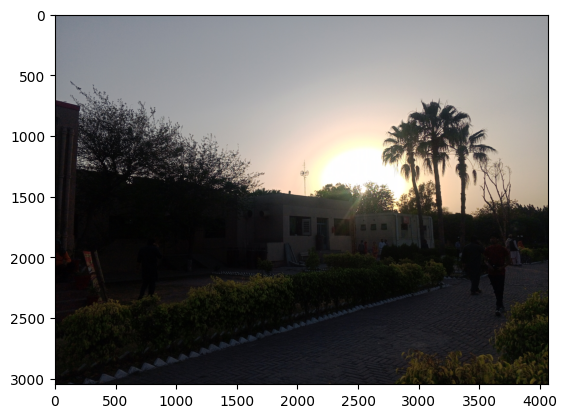

In [86]:
checkerboard = cv2.imread(r"../source/img_5.jpg")
checkerboard = cv2.cvtColor(checkerboard, cv2.COLOR_BGR2RGB)/255
plt.imshow(checkerboard)

In [87]:
def compute_derivatives(img):
    # Using sobel filter

    Ix = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize= 1)
    Iy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize= 1)
    return Ix, Iy
Ix, Iy = compute_derivatives(checkerboard[:,:,0])


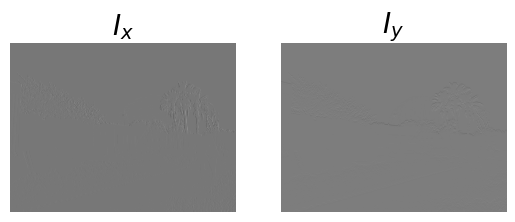

In [88]:
fig, ax = plt.subplots(1, 2)

ax[0].set_title('$I_x$', fontsize = 20)
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].imshow(Ix, cmap="gray")
ax[1].set_title('$I_y$', fontsize = 20)
ax[1].imshow(Iy, cmap="gray")

In [89]:
def harris(Ix, Iy, window_size=3, k=0.04):

    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    kernel = np.ones((window_size, window_size))

    Sxx = cv2.filter2D(Ixx, -1, kernel)
    Syy = cv2.filter2D(Iyy, -1, kernel)
    Sxy = cv2.filter2D(Ixy, -1, kernel)

    det = (Sxx * Syy) - (Sxy ** 2)
    trace = Sxx + Syy

    R = det - k * (trace ** 2)

    return R


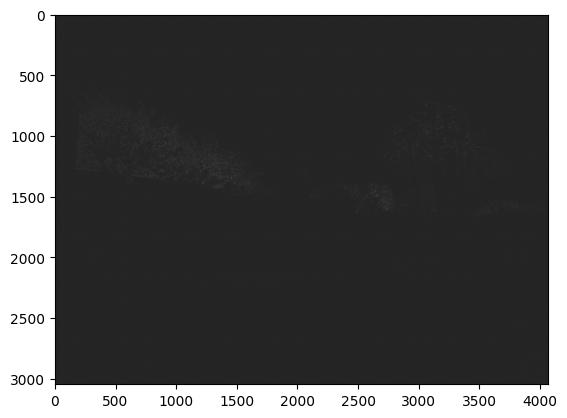

In [90]:
corners = harris(Ix, Iy, 3)
plt.imshow(corners, cmap = "gray")
plt.show()

In [91]:
def corner_detections(harris_matrix,radius, thresh):
  rows, cols = harris_matrix.shape
  window_size = radius*2 + 1
  kernel = np.ones((window_size, window_size))

  iterations = window_size**2
  dilated = cv2.dilate(harris_matrix,kernel, iterations)
  bordermask = np.zeros_like(harris_matrix)
  bordermask[radius:-radius, radius:-radius] = 1
  maxima = np.logical_and(np.logical_and(harris_matrix == dilated, harris_matrix > thresh), bordermask)
  detections = np.where(maxima)

  return detections


def draw_detections(img, detections, cross_halfsize = 3):

  image = img.copy()
  rows, cols = detections


  for row, col in zip(rows, cols):
    start_point = (col, row - cross_halfsize)
    end_point = (col, row + cross_halfsize)
    color = (1, 0, 0)
    thickness = 1
    img = cv2.line(image, start_point, end_point, color, thickness)
    start_point = (col - cross_halfsize, row)
    end_point = (col + cross_halfsize, row)
    img = cv2.line(image, start_point, end_point, color, thickness)


  plt.imshow(img)



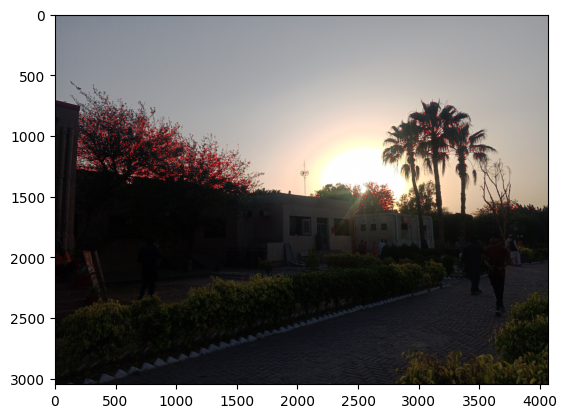

In [92]:
detections = corner_detections(corners,1, 0.5)
draw_detections(checkerboard, detections)

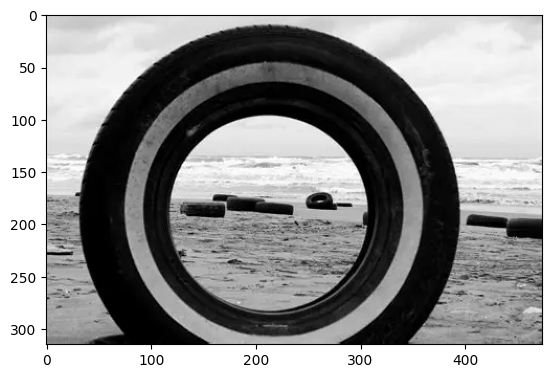

In [ ]:
img = cv2.imread(r"../source/circle.webp")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
plt.imshow(img)

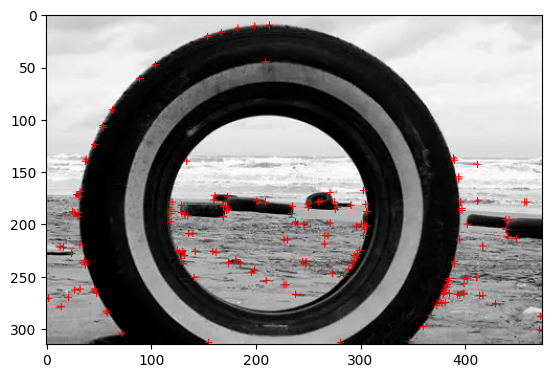

In [106]:
img = cv2.imread(r"../source/circle.webp")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
img_modified = cv2.GaussianBlur(img,(3,3),1)
Ix, Iy = compute_derivatives(img_modified[:,:,0])
corners = harris(Ix, Iy, 3)
detections = corner_detections(corners,1, 0.01)
draw_detections(img, detections)